<h1 align=center><font size = 7>Linear Regression</font></h1>


# **Linear Regression**

## Step1: Import the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Step2: Import the Data

In [108]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Step3: Data overview (General information about dataset)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Step4: Data preparation --> Dealing with Categorical Data

### One Hot (Encode the Categorical features)

In [96]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [97]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [98]:
df['region'].value_counts()


southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [109]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
df1 = df[['sex','smoker','region']]
transformer = make_column_transformer( (OneHotEncoder(), ['sex','smoker','region']),remainder='passthrough')

transformed = transformer.fit_transform(df1)
transformed_df = pd.DataFrame(transformed, columns=transformer.get_feature_names())


In [139]:
df1=df.drop(['sex','smoker','region'],axis=1)
dfFinal=pd.concat([transformed_df, df1], axis=1, ignore_index=False)
dfFinal.head()

,onehotencoder__x0_female,onehotencoder__x0_male,onehotencoder__x1_no,onehotencoder__x1_yes,onehotencoder__x2_northeast,onehotencoder__x2_northwest,onehotencoder__x2_southeast,onehotencoder__x2_southwest,age,bmi,children,charges
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,19,27.900,0,16884.92400
1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,18,33.770,1,1725.55230
2,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,28,33.000,3,4449.46200
3,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,33,22.705,0,21984.47061
4,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,32,28.880,0,3866.85520


# 📈 Training a Linear Regression Model

## Step5: Determine the Features & Target Variable

In [143]:
Xs=dfFinal.drop('charges',axis=1)
Ys=dfFinal['charges']


## Step6: Split the Dataset to Train & Test

In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, Ys, test_size=0.2, random_state=101)
X_test.shape,X_train.shape,y_test.shape,y_train.shape

((268, 11), (1070, 11), (268,), (1070,))

## Step7: Train the Model using the X_train and y_train

In [146]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

model.fit(X_train,y_train)

LinearRegression()

## Step8: Coeficient Matrix (Find the coefficients)

In [147]:
pd.DataFrame(model.coef_,Xs.columns,columns=['Coef'])

,Coef
onehotencoder__x0_female,-54.371923
onehotencoder__x0_male,54.371923
onehotencoder__x1_no,-11827.918983
onehotencoder__x1_yes,11827.918983
onehotencoder__x2_northeast,424.392856
onehotencoder__x2_northwest,525.225009
onehotencoder__x2_southeast,-489.503468
onehotencoder__x2_southwest,-460.114397
age,244.506584
bmi,364.951179


## Step8: Predicting Test Data

In [150]:
yPred=model.predict(X_test)
pd.DataFrame({'Ytest':y_test,'Ypred':yPred})

,Ytest,Ypred
44,6079.67150,10870.194493
134,2457.21115,2931.009563
980,25517.11363,10552.515674
618,34439.85590,27006.858470
1238,6985.50695,6216.465373
...,...,...
648,1712.22700,2446.729154
1023,1711.02680,55.386787
28,2775.19215,126.662937
798,11848.14100,12912.516856


## Step9: Evalutaing the Model (Find the error (MSE) of the model)

In [153]:
from sklearn import metrics
MAE=metrics.mean_absolute_error(y_test,yPred)
MSE=metrics.mean_squared_error(y_test,yPred)
RMSE=np.sqrt(MSE)
MAE,MSE,RMSE

(4036.8740283584416, 33748393.37059593, 5809.336741022673)

In [154]:
dfFinal['charges'].mean()

13270.422265141257

## Step10: Residuals (Difference between y_test and y_pred)

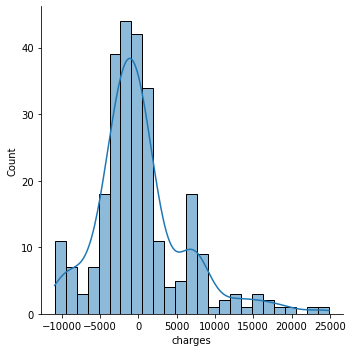

In [156]:
test_Residuals=y_test-yPred
sns.displot(test_Residuals,bins=25,kde=True);

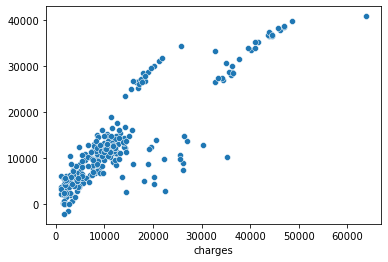

In [158]:
sns.scatterplot(x=y_test,y=yPred);

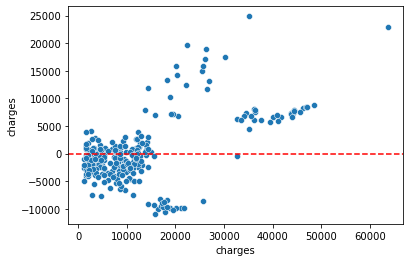

In [159]:
sns.scatterplot(x=y_test,y=test_Residuals);
plt.axhline(y=0,color='r',ls='--');

## Step11: Saving and Loading the Model (Save the trained model and load that again)

In [161]:
from joblib import dump,load
finalModel=LinearRegression()
finalModel.fit(Xs,Ys)
dump(finalModel,'Reg_OneHot.joblib')

['Reg_OneHot.joblib']

In [162]:
loadModel=load(filename='Reg_OneHot.joblib')

## Step12: Predict a sample  (ex: [19, 27.9, 0,0,1,0,0,1])

In [167]:
testData=[[0,0,1,0,0,1,0,0,19,27,0],
[0,0,1,0,0,1,0,0,39,27,4],
[0,1,1,1,0,1,0,1,10,90,0],
[1,0,1,0,1,1,0,1,70,33,5],
[0,1,1,0,0,1,1,0,25,44,1],
]
loadModel.predict(testData)

array([ 1681.33429041,  8720.46352176, 32224.38303005, 19473.29637568,
        8950.59166811])